In [51]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, Column, Integer, String, ForeignKey, Float
from sqlalchemy.orm import sessionmaker, relationship, declarative_base

load_dotenv()
DATABASE_URL = os.getenv("DATABASE_URL", "sqlite:///example.db")
engine = create_engine(DATABASE_URL)
SessionLocal = sessionmaker(autocommit=False, autoflush=False, bind=engine)

Base = declarative_base()

# Definition of the Users table
class User(Base):
    __tablename__ = "users"
    id = Column(Integer, primary_key=True, index=True)
    name = Column(String, index=True)
    age = Column(Integer)
    email = Column(String, unique=True, index=True)
    orders = relationship("Order", back_populates="user")

# Definition of the Food table
class Food(Base):
    __tablename__ = "food"
    id = Column(Integer, primary_key=True, index=True)
    name = Column(String, unique=True, index=True)
    price = Column(Float)
    orders = relationship("Order", back_populates="food")

# Definition of the Orders table
class Order(Base):
    __tablename__ = "orders"
    id = Column(Integer, primary_key=True, index=True)
    food_id = Column(Integer, ForeignKey("food.id"))
    user_id = Column(Integer, ForeignKey("users.id"))
    user = relationship("User", back_populates="orders")
    food = relationship("Food", back_populates="orders")
    print(DATABASE_URL)

sqlite:///example.db


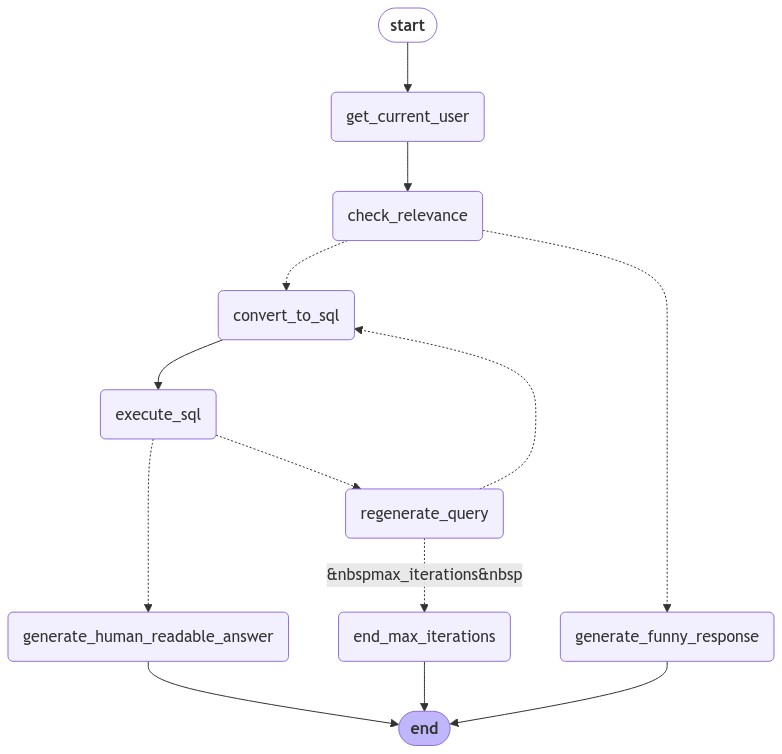

In [52]:
from main import app
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except:
    pass

In [53]:
fake_config = {"configurable": {"current_user_id": "2"}}

In [54]:
user_question_1 = "Create a new order for tiramisu."
result_1 = app.invoke({"question": user_question_1, "attempts": 0}, config=fake_config)
print("Result:", result_1["query_result"])

Retrieving the current user based on user ID.
Current user set to: Bob
Retrieved database schema.
Checking relevance of the question: Create a new order for tiramisu.
Relevance determined: relevant
Retrieved database schema.
Converting question to SQL for user 'Bob': Create a new order for tiramisu.
Generated SQL query: INSERT INTO orders (food_id, user_id)
SELECT id, (SELECT id FROM users WHERE name = 'Bob') 
FROM food
WHERE name = 'tiramisu';
Executing SQL query: INSERT INTO orders (food_id, user_id)
SELECT id, (SELECT id FROM users WHERE name = 'Bob') 
FROM food
WHERE name = 'tiramisu';
SQL command executed successfully.
Generating a human-readable answer.
Generated human-readable answer.
Result: Hello Bob, your order for tiramisu has been successfully placed.


In [55]:
def get_orders_for_user(user_id: int):
    session = SessionLocal()
    try:
        orders = (
            session.query(Order)
            .join(Food, Order.food_id == Food.id)
            .filter(Order.user_id == user_id)
            .all()
        )
        if not orders:
            print(f"No orders found for user_id {user_id}.")
            return []

        order_list = []
        for order in orders:
            order_info = {
                "order_id": order.id,
                "food_name": order.food.name,
                "price": order.food.price
            }
            order_list.append(order_info)

        return order_list
    except Exception as e:
        print(f"Error retrieving orders for user_id {user_id}: {e}")
        return []
    finally:
        session.close()

orders = get_orders_for_user(2)
orders

[{'order_id': 1, 'food_name': 'Pizza Margherita', 'price': 12.5},
 {'order_id': 2, 'food_name': 'spaghetti', 'price': 12.0}]

In [56]:
user_question_2 = "Tell me a joke."
result_2 = app.invoke({"question": user_question_2, "attempts": 0}, config=fake_config)
print("Result:", result_2["query_result"])

Retrieving the current user based on user ID.
Current user set to: Bob
Retrieved database schema.
Checking relevance of the question: Tell me a joke.
Relevance determined: not_relevant
Generating a funny response for an unrelated question.
Generated funny response.
Result: Haha, that's a creative way to suggest ordering food! I must admit, talking about food always makes me hungry. What's your go-to delicious order when you're feeling peckish?


In [57]:
user_question_3 = "Show me my orders"
result_3 = app.invoke({"question": user_question_3, "attempts": 0}, config=fake_config)
print("Result:", result_3["query_result"])

Retrieving the current user based on user ID.
Current user set to: Bob
Retrieved database schema.
Checking relevance of the question: Show me my orders
Relevance determined: relevant
Retrieved database schema.
Converting question to SQL for user 'Bob': Show me my orders
Generated SQL query: SELECT food.name AS food_name, food.price AS price
FROM food
JOIN orders ON food.id = orders.food_id
JOIN users ON orders.user_id = users.id
WHERE users.name = 'Bob';
Executing SQL query: SELECT food.name AS food_name, food.price AS price
FROM food
JOIN orders ON food.id = orders.food_id
JOIN users ON orders.user_id = users.id
WHERE users.name = 'Bob';
Raw SQL Query Result: [{'food_name': 'Lasagne', 'price': 14.0}, {'food_name': 'Spaghetti Carbonara', 'price': 15.0}, {'food_name': 'Spaghetti Carbonara', 'price': 15.0}, {'food_name': 'Spaghetti Carbonara', 'price': 15.0}, {'food_name': 'Spaghetti Carbonara', 'price': 15.0}, {'food_name': 'Spaghetti Carbonara', 'price': 15.0}, {'food_name': 'Spaghetti